In [1]:
import numpy as np
import pandas as pd

# Import News Data

In [2]:
CP= pd.read_csv('xinhua_news',encoding='utf8')

In [3]:
CP.head()

,Unnamed: 0,source,content
0,4,0,原 标题 44 岁 女子 跑 深圳 约会 网友 被 拒 暴雨 中 裸身 奔走 深圳 交警 微...
1,5,0,受到 A股 被 纳入 MSCI 指数 的 利好 消息 刺激 A股 市场 从 周三 开始 再度...
2,7,0,沙漠 雄鹰 震荡 有利 消化 套牢 筹码 周四 开盘 上证 50 在 银行 券商 大 蓝筹 ...
3,8,0,原 标题 武汉 警方 一下子 抓 了 808 人 还 都 是 俊男靓女 原来 他们 每天 偷...
4,9,0,6 月 21 日 A股 纳入 MSCI 指数 尘埃落定 但 当天 被 寄予厚望 的 券商 股...


In [4]:
from sklearn.feature_extraction.text import  TfidfVectorizer

In [5]:
V= TfidfVectorizer(max_features=50)

In [6]:
X = V.fit_transform(CP.loc[:,'content'])

In [7]:
list(V.vocabulary_)[:10]

['一路', '记者', '表示', '照片', '目前', '进行', '一个', '市场', '经济', '中国']

# Data split

In [8]:
from sklearn.model_selection import  train_test_split
import random

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.5)

NameError: name 'x' is not defined

In [ ]:
X[0].toarray()

# Logic Regression with iris data set

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn import datasets

In [14]:
iris = datasets.load_iris()

In [15]:
iris['target'].shape

(150,)

In [16]:
iris['data'].shape

(150, 4)

In [17]:
x_train , x_test,y_train, y_test=train_test_split(iris['data'],iris['target'],train_size=0.7)

In [18]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
y_train

array([0, 2, 1, 2, 2, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2, 2, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2, 1, 1,
       0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 0, 0, 1, 1, 0,
       2, 0, 0, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 2,
       1, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2, 2, 2])

In [20]:
y_train_011=np.where(y_train==0,0,1)

In [21]:
y_train_011

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [22]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train_011)

In [23]:
y_test_011 = np.where(y_test==0,0,1)
y_test_011

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1])

In [24]:
z_test = list(zip(x_test,y_test_011))
z_test[:5]

[(array([4.8, 3. , 1.4, 0.3]), 0),
 (array([5.7, 3. , 4.2, 1.2]), 1),
 (array([5.4, 3.7, 1.5, 0.2]), 0),
 (array([4.9, 3. , 1.4, 0.2]), 0),
 (array([6.7, 3.1, 4.4, 1.4]), 1)]

In [25]:
y_test_pre=clf.predict(x_test)
y_test_pre

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1])

In [26]:
z_test[:10]

[(array([4.8, 3. , 1.4, 0.3]), 0),
 (array([5.7, 3. , 4.2, 1.2]), 1),
 (array([5.4, 3.7, 1.5, 0.2]), 0),
 (array([4.9, 3. , 1.4, 0.2]), 0),
 (array([6.7, 3.1, 4.4, 1.4]), 1),
 (array([6.5, 3. , 5.5, 1.8]), 1),
 (array([5.9, 3. , 4.2, 1.5]), 1),
 (array([5.6, 3. , 4.5, 1.5]), 1),
 (array([4.9, 2.4, 3.3, 1. ]), 1),
 (array([6.2, 2.9, 4.3, 1.3]), 1)]

In [27]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

In [28]:
print('acc:{}\nrecall:{}\npre:{}\nf1:{}'.format(accuracy_score(y_test_011,y_test_pre),recall_score(y_test_011,y_test_pre),
                                         precision_score(y_test_011,y_test_pre),f1_score(y_test_011,y_test_pre)))

acc:1.0
recall:1.0
pre:1.0
f1:1.0


In [29]:
list(zip(clf.predict_proba(x_test),clf.predict(x_test),y_test_011))[:10]

[(array([0.98253227, 0.01746773]), 0, 0),
 (array([0.01385167, 0.98614833]), 1, 1),
 (array([0.98431716, 0.01568284]), 0, 0),
 (array([0.98313355, 0.01686645]), 0, 0),
 (array([0.00421003, 0.99578997]), 1, 1),
 (array([1.98740643e-04, 9.99801259e-01]), 1, 1),
 (array([0.00923882, 0.99076118]), 1, 1),
 (array([0.00531947, 0.99468053]), 1, 1),
 (array([0.12904956, 0.87095044]), 1, 1),
 (array([0.00669855, 0.99330145]), 1, 1)]

# Decision Tree with iris data set

In [30]:
from sklearn import tree

In [51]:
clf1 = tree.DecisionTreeClassifier(criterion='entropy')

In [52]:
clf1= clf1.fit(iris.data,iris.target)

[Text(167.4, 199.32, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\nentropy = 0.918\nsamples = 3\nvalue

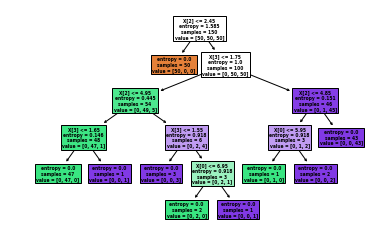

In [53]:
tree.plot_tree(clf1,filled=True)

In [63]:
iris.data[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [59]:
clf1.predict(iris.data[0:100,:])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [61]:
clf1.predict_proba(iris.data[45:55,:])

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

# Bayse   discrete data / continouse data

## feature 离散分布假设

In [71]:
from sklearn.naive_bayes import BaseDiscreteNB

## feature 高斯分布假设

In [70]:
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB #
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print("Number of mislabeled points out of a total %d points : %d"
      % (iris.data.shape[0],(iris.target != y_pred).sum()))

Number of mislabeled points out of a total 150 points : 6


# support vector machine